In [1]:
import rasterio
import numpy as np
import pandas as pd

In [2]:
# Open the GeoTIFF file
tif_path = r"C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\Rainfall\UP_Rainfall_2012.tif"

In [8]:
with rasterio.open(tif_path) as src:
    # Read the entire raster data into a numpy array
    
    num_bands = src.count
    data = src.read(1)

    # Print information about the GeoTIFF
    print(f"Number of Bands: {num_bands}")
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"CRS (Coordinate Reference System): {src.crs}")
    print(f"Transform (Affine Transformation): {src.transform}")
    print(f"Metadata: {src.meta}")  # Assuming it's a single-band image

Number of Bands: 366
Width: 31, Height: 27
CRS (Coordinate Reference System): EPSG:4326
Transform (Affine Transformation): | 0.25, 0.00, 77.00|
| 0.00,-0.25, 30.50|
| 0.00, 0.00, 1.00|
Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -999.0, 'width': 31, 'height': 27, 'count': 366, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.25, 0.0, 77.0,
       0.0, -0.25, 30.5)}


In [4]:
with rasterio.open(tif_path) as src:
    band_data = src.read(1)
    print("Band Statistics:")
    print("Min:", band_data.min())
    print("Max:", band_data.max())
    print("Mean:", band_data.mean())
    print("Std:", band_data.std())

Band Statistics:
Min: -999.0
Max: 31.460428
Mean: -587.0557
Std: 494.39517


In [10]:
with rasterio.open(tif_path) as src:
    nodata_value = src.meta['nodata']
    print("NoData Value:", src.meta['nodata'])
    nodata_count = (data == nodata_value).sum()

    print(f"Number of NoData values: {nodata_count}")

NoData Value: -999.0
Number of NoData values: 494


In [6]:
with rasterio.open(tif_path) as src:
    print("Data Type:", src.meta['dtype'])

Data Type: float32


In [7]:
with rasterio.open(tif_path) as src:
    for band in range(1, src.count + 1):
        band_data = src.read(band)
        print(f"Band {band} Statistics:")
        print("Min:", band_data.min())
        print("Max:", band_data.max())
        print("Mean:", band_data.mean())
        print("Std:", band_data.std())
        

Band 1 Statistics:
Min: -999.0
Max: 31.460428
Mean: -587.0557
Std: 494.39517
Band 2 Statistics:
Min: -999.0
Max: 54.867123
Mean: -581.1903
Std: 501.5058
Band 3 Statistics:
Min: -999.0
Max: 26.207165
Mean: -589.2559
Std: 491.73734
Band 4 Statistics:
Min: -999.0
Max: 2.571756
Mean: -589.58624
Std: 491.33633
Band 5 Statistics:
Min: -999.0
Max: 2.571756
Mean: -589.58356
Std: 491.33954
Band 6 Statistics:
Min: -999.0
Max: 7.811448
Mean: -589.5336
Std: 491.39978
Band 7 Statistics:
Min: -999.0
Max: 11.67165
Mean: -589.0388
Std: 491.99557
Band 8 Statistics:
Min: -999.0
Max: 5.380601
Mean: -589.4664
Std: 491.48053
Band 9 Statistics:
Min: -999.0
Max: 12.706383
Mean: -589.2563
Std: 491.73395
Band 10 Statistics:
Min: -999.0
Max: 4.762906
Mean: -589.5784
Std: 491.34576
Band 11 Statistics:
Min: -999.0
Max: 0.338747
Mean: -589.61017
Std: 491.3076
Band 12 Statistics:
Min: -999.0
Max: 0.4589799
Mean: -589.61194
Std: 491.30548
Band 13 Statistics:
Min: -999.0
Max: 2.6881142
Mean: -589.6064
Std: 491.31213


In [9]:
with rasterio.open(tif_path) as src:
    # Print metadata information
    print("Metadata: ")
    print(src.meta)

    # Print band descriptions if available
    if src.descriptions:
        print("\nBand Descriptions:")
        for i, desc in enumerate(src.descriptions, 1):
            print(f"Band {i}: {desc}")

Metadata: 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -999.0, 'width': 31, 'height': 27, 'count': 366, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.25, 0.0, 77.0,
       0.0, -0.25, 30.5)}

Band Descriptions:
Band 1: None
Band 2: None
Band 3: None
Band 4: None
Band 5: None
Band 6: None
Band 7: None
Band 8: None
Band 9: None
Band 10: None
Band 11: None
Band 12: None
Band 13: None
Band 14: None
Band 15: None
Band 16: None
Band 17: None
Band 18: None
Band 19: None
Band 20: None
Band 21: None
Band 22: None
Band 23: None
Band 24: None
Band 25: None
Band 26: None
Band 27: None
Band 28: None
Band 29: None
Band 30: None
Band 31: None
Band 32: None
Band 33: None
Band 34: None
Band 35: None
Band 36: None
Band 37: None
Band 38: None
Band 39: None
Band 40: None
Band 41: None
Band 42: None
Band 43: None
Band 44: None
Band 45: None
Band 46: None
Band 47: None
Band 48: None
Band 49: None
Band 50: None
Band 51: None
Band 52: None
Band 53: None
Band 54: None
Band 55: None
Band 56: None
Band

In [14]:
from sklearn.decomposition import PCA

output_path = r"C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\Rainfall\Dataset - Rainfall\UP_lulc_2012_pca1.tif"


In [15]:
# Open the GeoTIFF file
with rasterio.open(tif_path) as src:
    # Read all bands into a 2D numpy array (rows represent pixels, columns represent bands)
    data = src.read().reshape(src.count, -1)

    # Apply PCA
    num_components = 3  # Set the desired number of components
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(data.T)

    # Reshape the transformed data back to the original shape
    transformed_data = principal_components.T.reshape(num_components, src.height, src.width)

    # Now, you can save the transformed data as a new GeoTIFF
    with rasterio.open(output_path, 'w', **src.profile) as dst:
        dst.write(transformed_data[0], 1)

Percentage of Zaid Crop: 0.20%


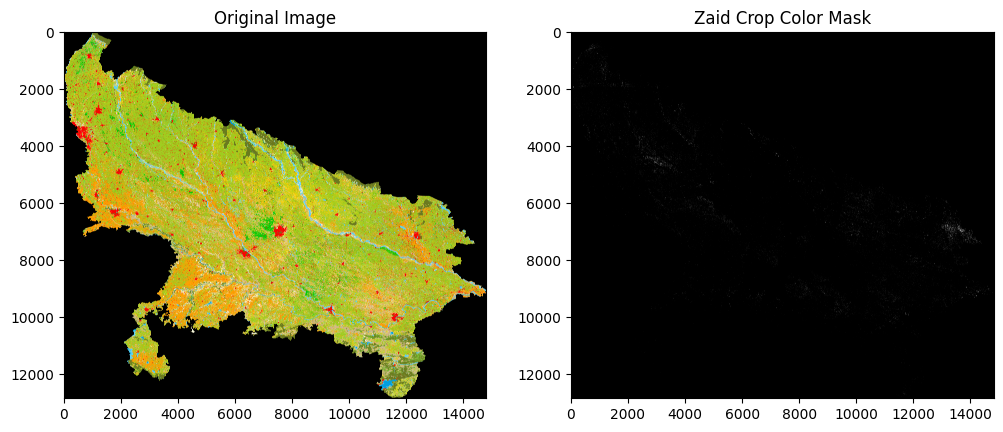

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.tif' with the actual path to your TIFF image file
image_path = r"C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\LULC\UP_LULC_2012.tif"

# Read the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the target color for "Zaid Crop"
target_color = np.array([158, 81, 43], dtype=np.uint8)

# Set a color tolerance for matching
color_tolerance = 20  # Adjust as needed

# Create a mask for the target color with tolerance
lower_bound = target_color - color_tolerance
upper_bound = target_color + color_tolerance
mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

# Calculate the percentage of pixels matching the target color
total_pixels = image.shape[0] * image.shape[1]
zaid_crop_pixels = np.count_nonzero(mask)
percentage_zaid_crop = (zaid_crop_pixels / total_pixels) * 100
print(f"Percentage of Zaid Crop: {percentage_zaid_crop:.2f}%")

# Plot the original image and the mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Zaid Crop Color Mask')

plt.show()


Percentage of Kharif Crop: 0.00%


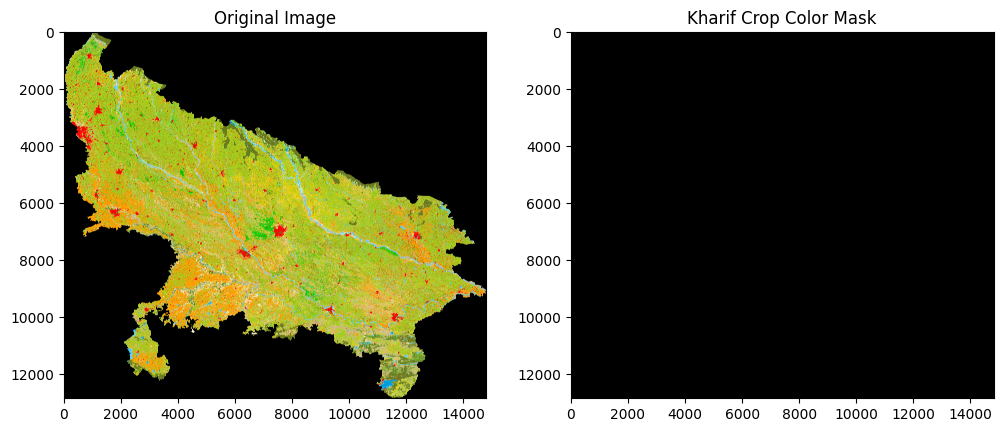

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.tif' with the actual path to your TIFF image file
image_path = r"C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\LULC\UP_LULC_2012.tif"

# Read the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the target color for "Kharif Crop"
target_color = np.array([225, 209, 0], dtype=np.uint8)

# Set a color tolerance for matching
color_tolerance = 50  # Adjust as needed

# Create a mask for the target color with tolerance
lower_bound = target_color - color_tolerance
upper_bound = target_color + color_tolerance
mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

# Calculate the percentage of pixels matching the target color
total_pixels = image.shape[0] * image.shape[1]
kharif_crop_pixels = np.count_nonzero(mask)
percentage_kharif_crop = (kharif_crop_pixels / total_pixels) * 100
print(f"Percentage of Kharif Crop: {percentage_kharif_crop:.2f}%")

# Plot the original image and the mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Kharif Crop Color Mask')

plt.show()
